## 多元线性回归

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# import model
from sklearn.linear_model import LinearRegression

 Advertising 数据集 描述了某个产品的销量与广告媒体的投入之间影响。

In [2]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head() # display the first 5 rows

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

In [4]:
import seaborn as sns
# allow plots to appear within the notebook
%matplotlib inline 

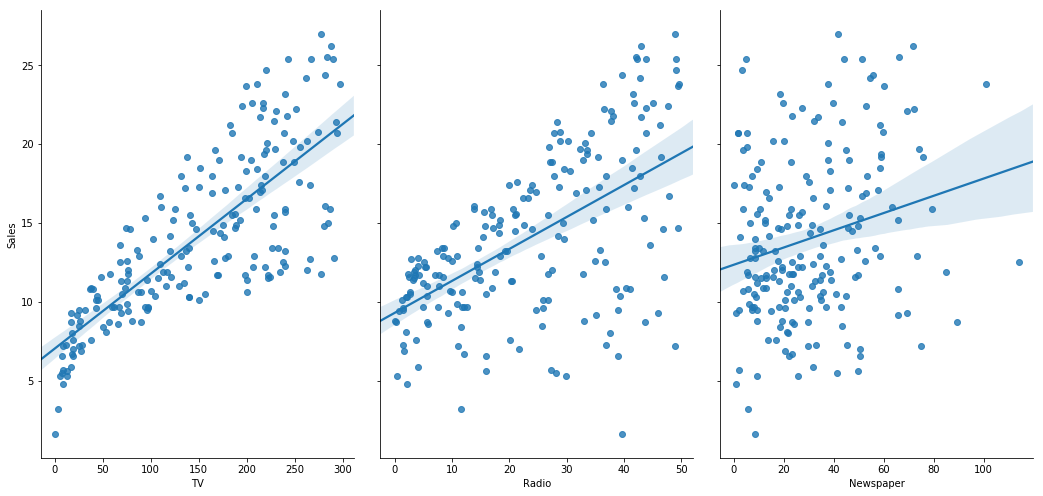

In [8]:
# aspect 宽高比
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

In [9]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

X.head() # print the first 5 rows

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [10]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [11]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [12]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) #random_state 系统，拆分结果相同

In [14]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [15]:
# 线性回归

linreg = LinearRegression()
# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
# print the intercept and coefficients
print(linreg.intercept_) # intercept_ 常数项
print(linreg.coef_) # 系数

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_)) #zip 拉链 一一对应

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

### 预测

In [19]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### 计算 RMSE for our Sales predictions

In [21]:
from sklearn import metrics #指标

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #标准 均方误差。越小越好
print(linreg.score(X_test, y_test))

1.404651423032895
0.9156213613792233


## 做新的模型

In [23]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


print(linreg.score(X_test, y_test))

1.3879034699382886
0.9176214942248908


In [ ]:
# 新模型比旧的好。

In [28]:
# create a Python list of feature names
feature_cols = ['TV']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


print(linreg.score(X_test, y_test))

3.210929707703542
0.5590828580007852
